In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Milind\Desktop\Analytics\glass.csv")

In [5]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
df['Type'] = df['Type'].map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})

In [7]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42, stratify= df['Type'])

In [10]:
train.value_counts('Type') / len(train)

Type
0    0.760234
1    0.239766
Name: count, dtype: float64

In [11]:
test.value_counts('Type') / len(test)

Type
0    0.767442
1    0.232558
Name: count, dtype: float64

In [12]:
train.shape

(171, 10)

In [13]:
test.shape

(43, 10)

In [14]:
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.00000,171.000000,171.000000,171.000000,171.000000
mean,1.518131,13.404795,2.722982,1.459298,72.682164,0.52731,8.868538,0.156901,0.054737,0.239766
std,0.002748,0.825564,1.420722,0.503201,0.742255,0.71419,1.356868,0.452056,0.095955,0.428195
min,1.511150,11.020000,0.000000,0.340000,69.890000,0.00000,5.430000,0.000000,0.000000,0.000000
25%,1.516490,12.885000,2.220000,1.190000,72.335000,0.14500,8.215000,0.000000,0.000000,0.000000
50%,1.517630,13.270000,3.480000,1.360000,72.790000,0.56000,8.590000,0.000000,0.000000,0.000000
75%,1.519050,13.785000,3.605000,1.630000,73.095000,0.61000,9.135000,0.000000,0.090000,0.000000
max,1.527770,17.380000,4.490000,3.500000,75.410000,6.21000,14.960000,2.880000,0.510000,1.000000


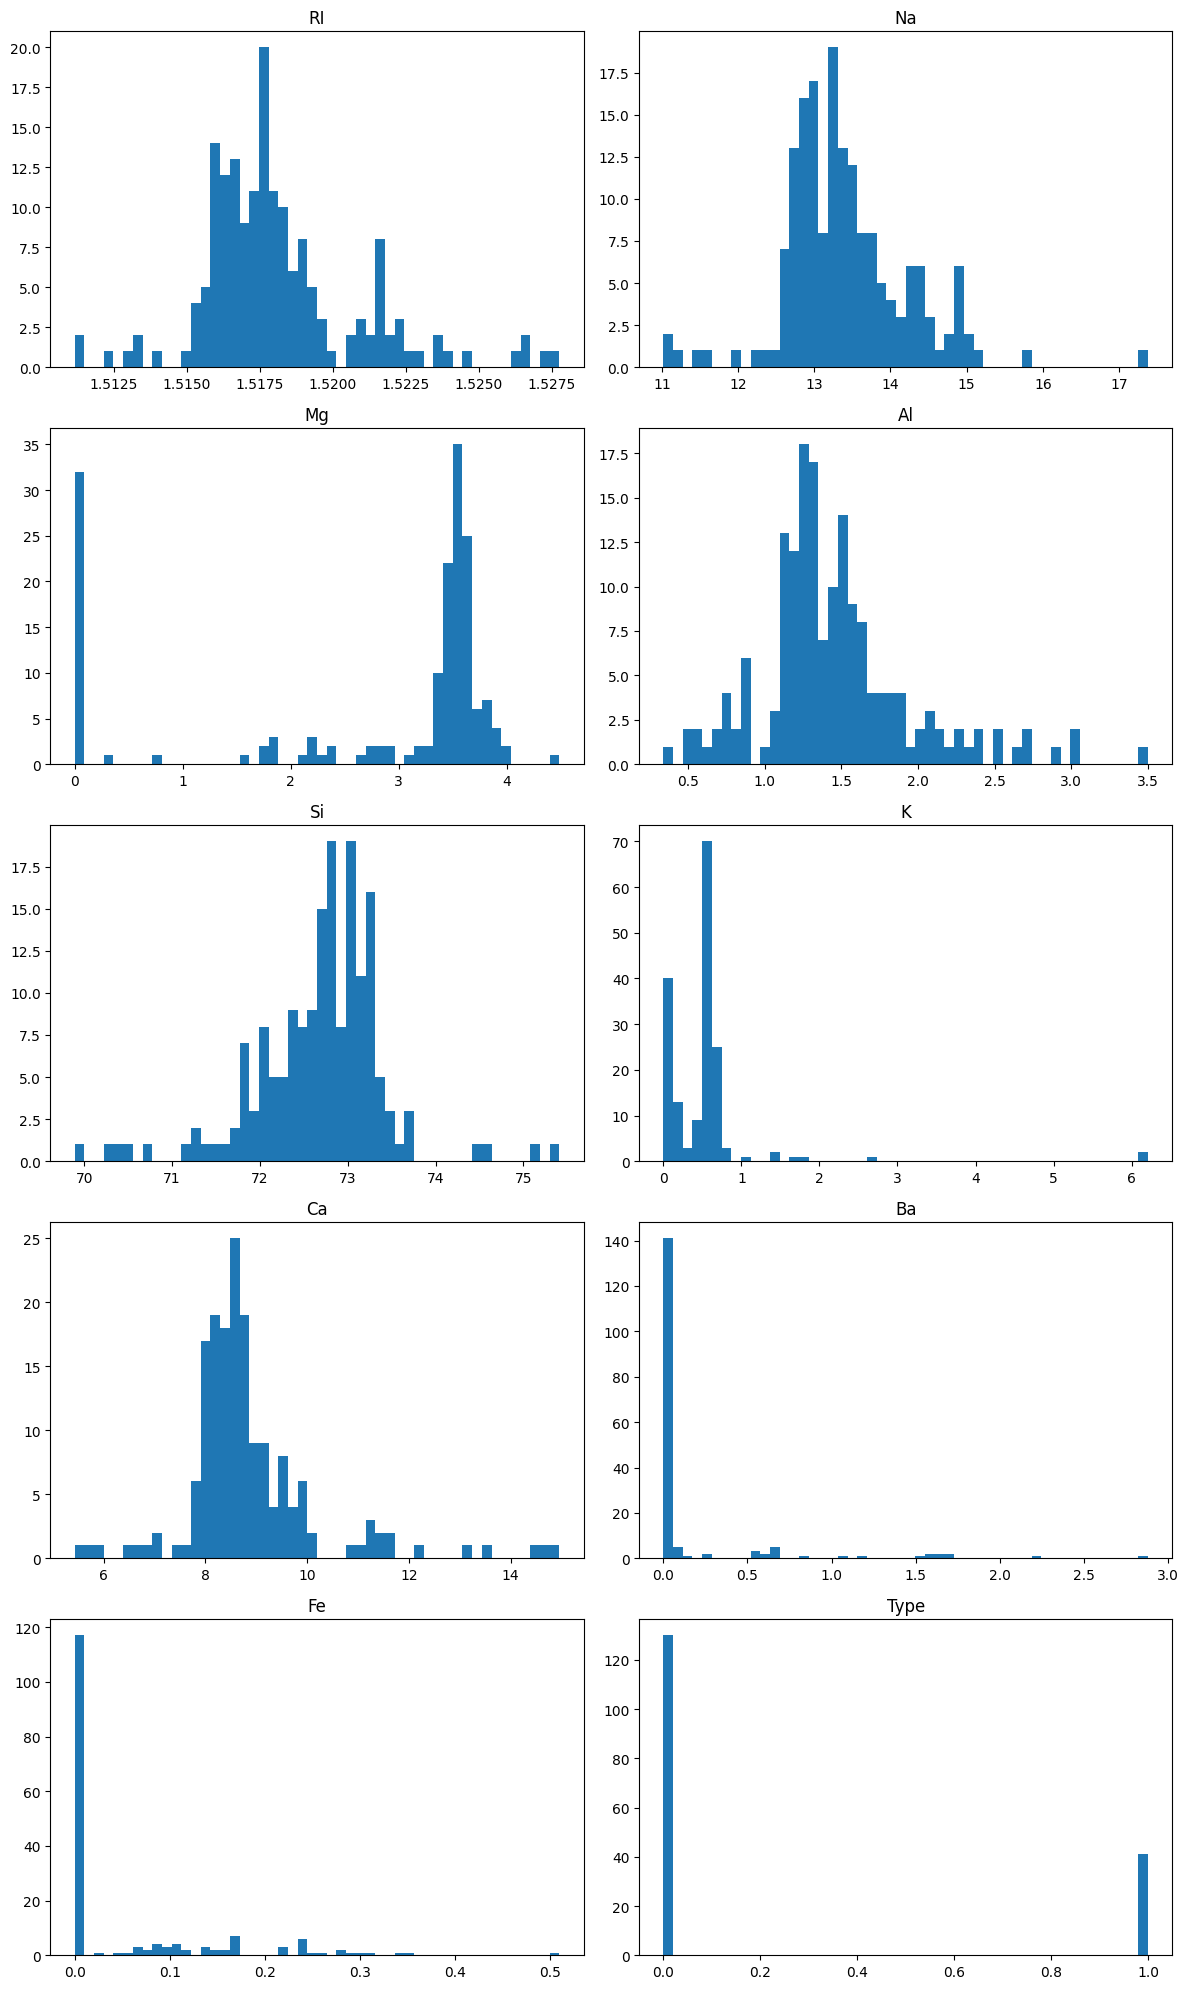

In [15]:
num_histograms = 10
num_cols = 2
num_rows = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(train.columns[:num_histograms]):
    axes[i].hist(train[col], bins=50)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

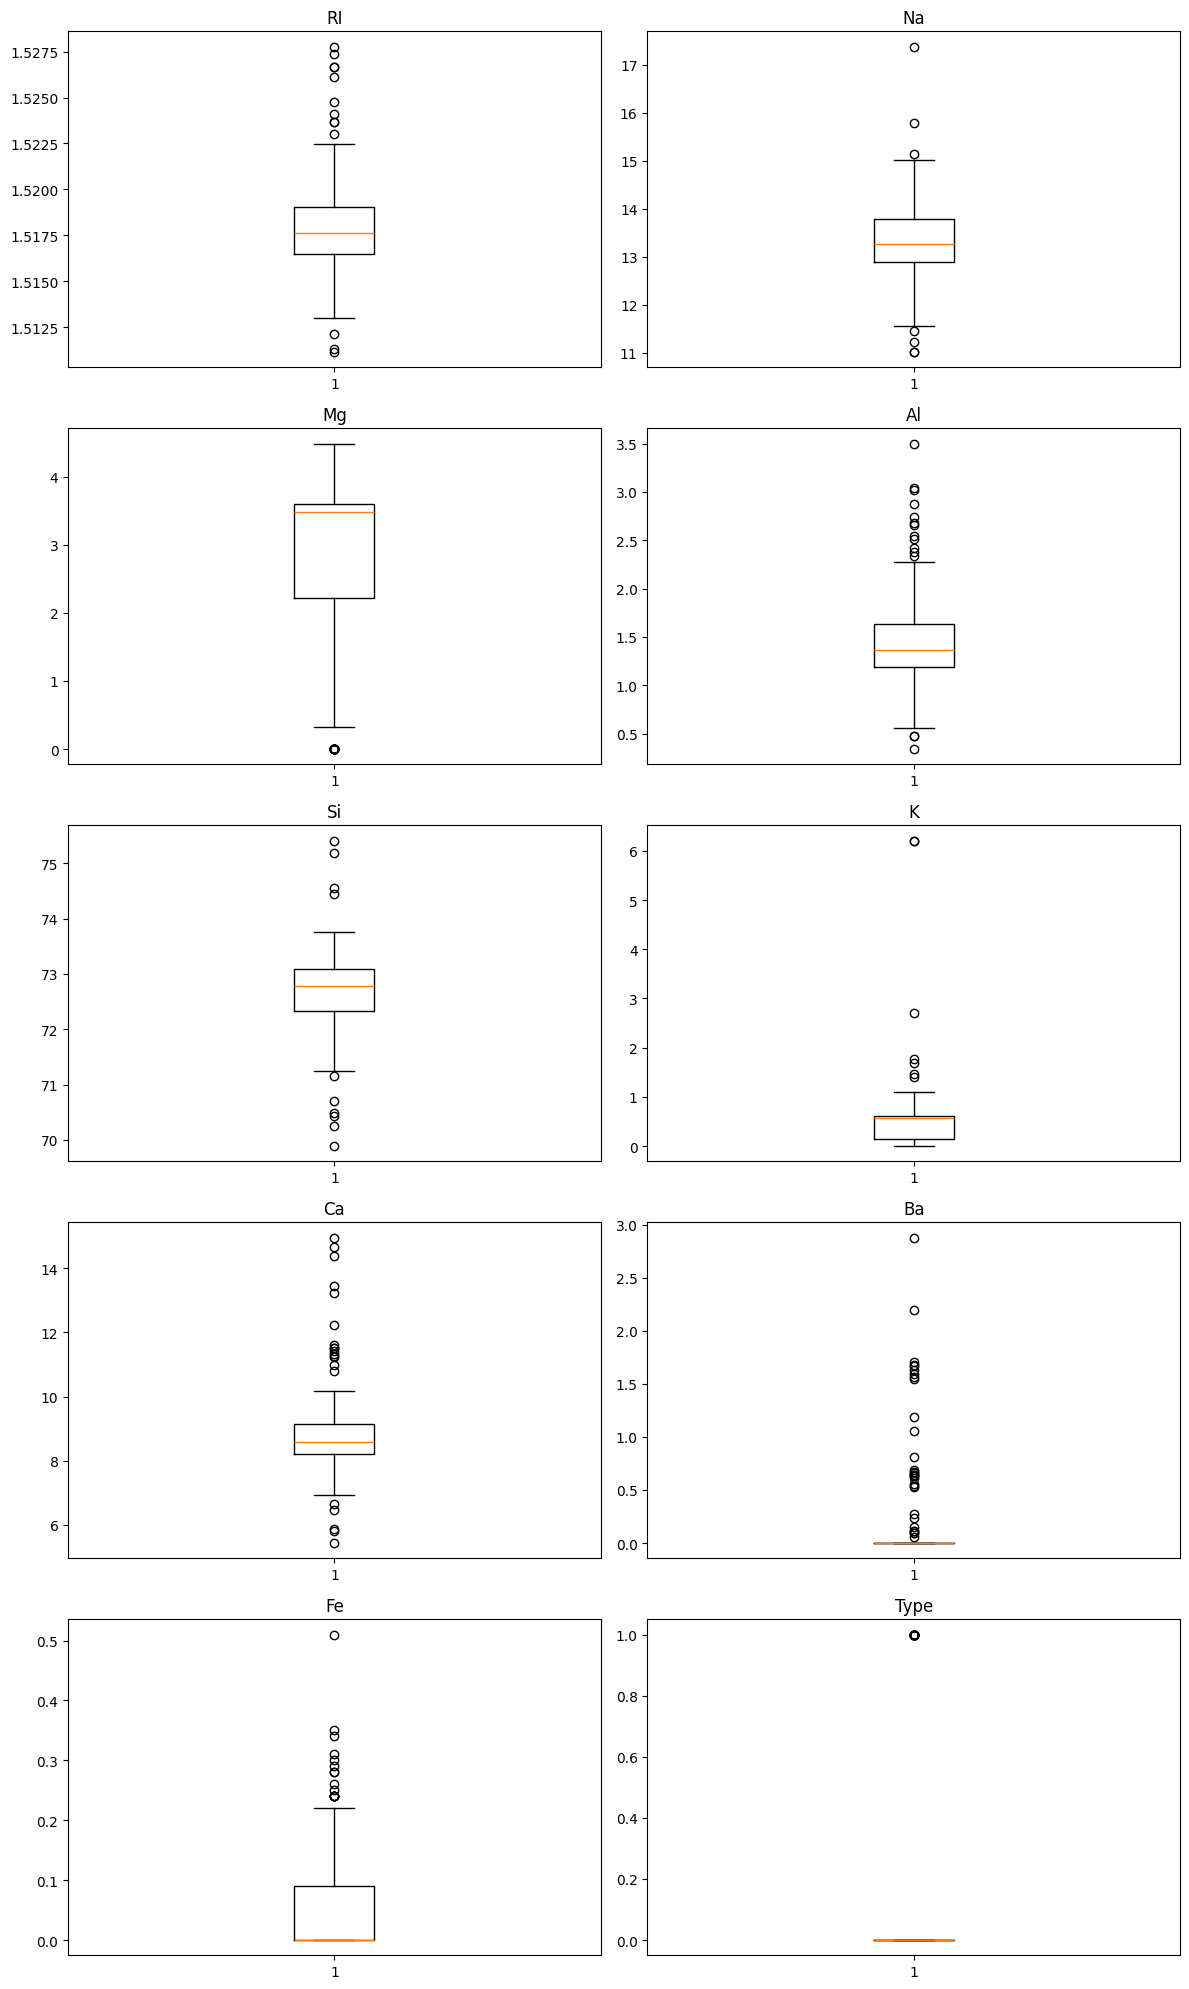

In [16]:
num_histograms = 10
num_cols = 2
num_rows = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(train.columns[:num_histograms]):
    axes[i].boxplot(train[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

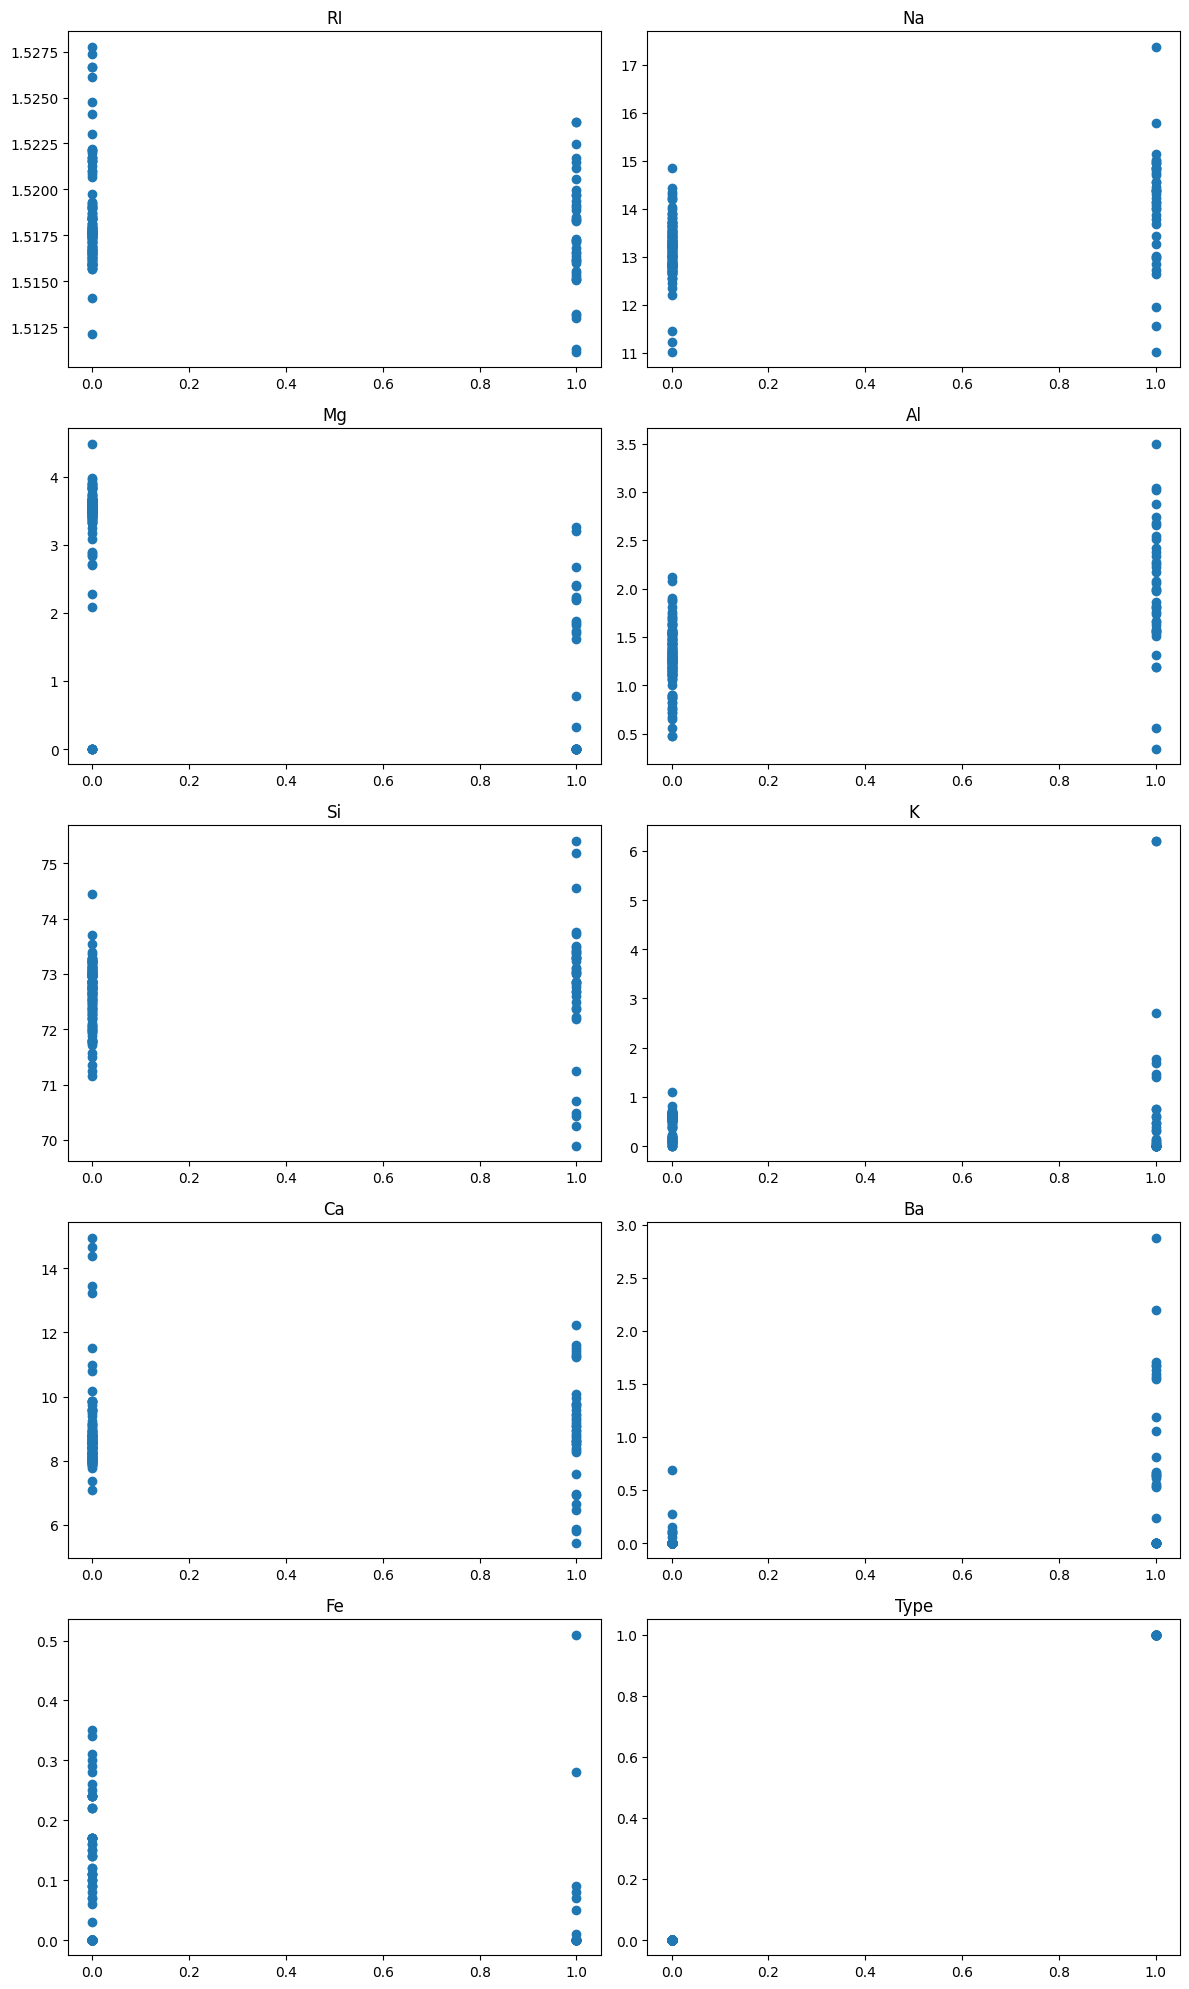

In [17]:
num_histograms = 10
num_cols = 2
num_rows = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(train.columns[:num_histograms]):
    axes[i].scatter(train['Type'], train[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

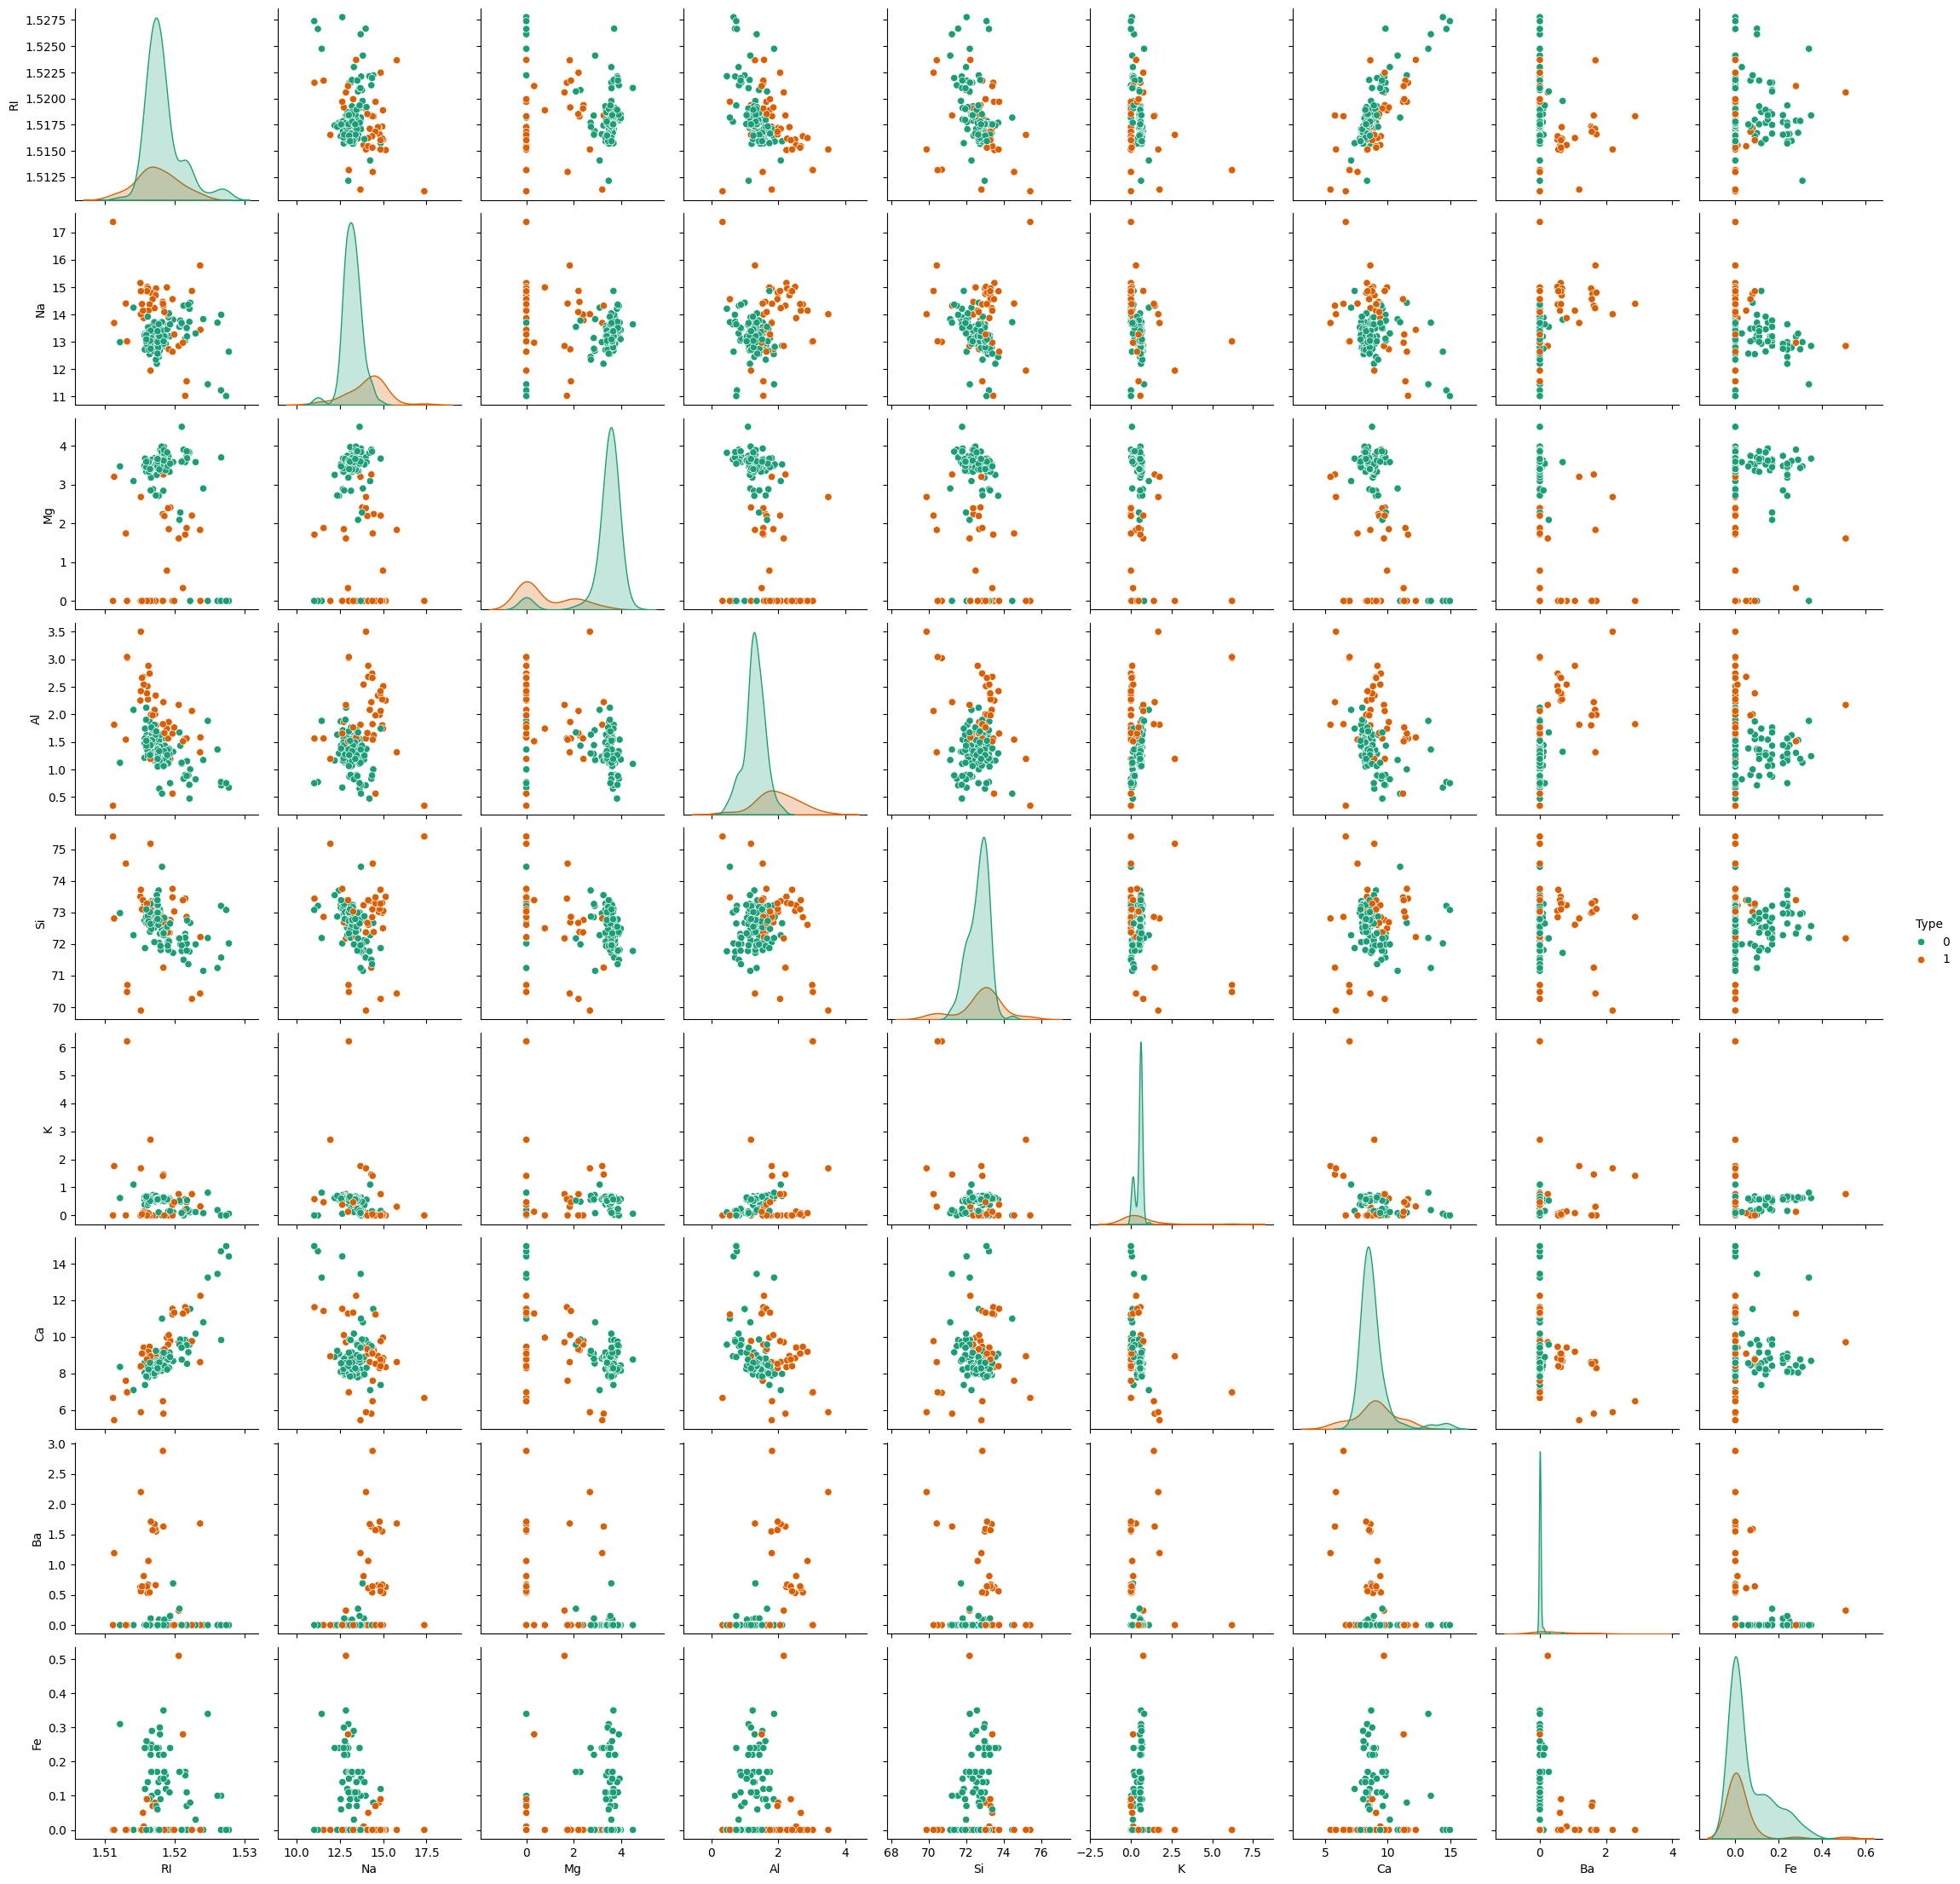

In [18]:
sns.pairplot(train, hue = 'Type', palette='Dark2')
plt.show()

In [19]:
train.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.174863,-0.080256,-0.441354,-0.400149,-0.315254,0.792238,-0.130753,0.063706,-0.130266
Na,-0.174863,1.000000,-0.302606,0.194398,-0.142388,-0.243847,-0.281204,0.449905,-0.232078,0.454168
Mg,-0.080256,-0.302606,1.000000,-0.450024,-0.217578,-0.036389,-0.422182,-0.453017,0.095350,-0.767195
Al,-0.441354,0.194398,-0.450024,1.000000,-0.123064,0.359387,-0.296271,0.489453,-0.076450,0.587470
Si,-0.400149,-0.142388,-0.217578,-0.123064,1.000000,-0.261357,-0.023883,-0.088040,0.003151,0.086086
K,-0.315254,-0.243847,-0.036389,0.359387,-0.261357,1.000000,-0.339152,-0.007265,-0.005899,0.095797
Ca,0.792238,-0.281204,-0.422182,-0.296271,-0.023883,-0.339152,1.000000,-0.241951,0.078576,0.044345
Ba,-0.130753,0.449905,-0.453017,0.489453,-0.088040,-0.007265,-0.241951,1.000000,-0.116175,0.572138
Fe,0.063706,-0.232078,0.095350,-0.076450,0.003151,-0.005899,0.078576,-0.116175,1.000000,-0.165244
Type,-0.130266,0.454168,-0.767195,0.587470,0.086086,0.095797,0.044345,0.572138,-0.165244,1.000000


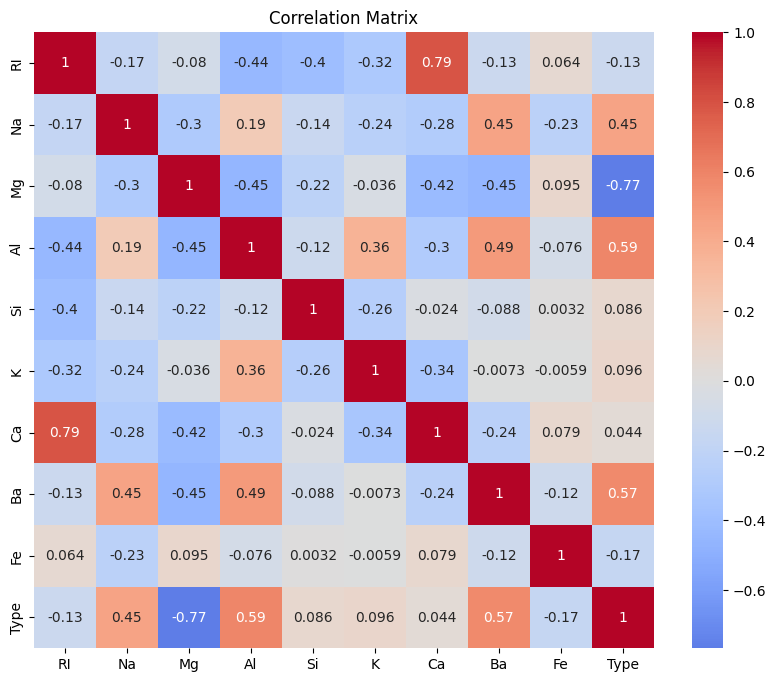

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [21]:
train.skew()

RI      1.014206
Na      0.677985
Mg     -1.224156
Al      1.071588
Si     -0.462340
K       6.159147
Ca      1.870976
Ba      3.460856
Fe      1.870197
Type    1.229879
dtype: float64

In [22]:
train['K'] = np.power(train['K'], 1/3)
test['K'] = np.power(test['K'], 1/3)

In [23]:
train['Ba'] = np.power(train['Ba'], 1/4)
test['Ba'] = np.power(test['Ba'], 1/4)

In [24]:
train.skew()

RI      1.014206
Na      0.677985
Mg     -1.224156
Al      1.071588
Si     -0.462340
K      -0.526094
Ca      1.870976
Ba      1.965539
Fe      1.870197
Type    1.229879
dtype: float64

In [25]:
X_train = train.drop('Type', axis=1)
y_train = train['Type']

X_test = test.drop('Type', axis=1)
y_test = test['Type']

In [26]:
X_train.shape

(171, 9)

In [27]:
y_train.shape

(171,)

In [28]:
X_test.shape

(43, 9)

In [29]:
y_test.shape

(43,)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 7)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

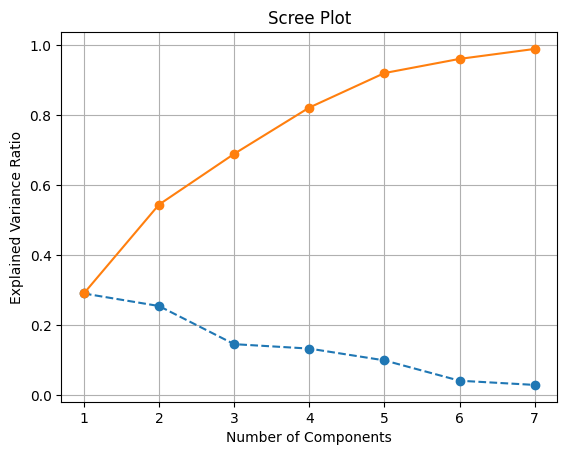

In [32]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [33]:
print(explained_variance_ratio_)

[0.28974766 0.25392266 0.14497518 0.13231189 0.09861148 0.04048704
 0.02848283]


In [34]:
print(cumulative_explained_variance)

[0.28974766 0.54367032 0.6886455  0.82095739 0.91956887 0.96005592
 0.98853875]


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [36]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_scaled, y_train)
sgd_clf.score(test_scaled, y_test)

0.9302325581395349

In [37]:
lr = LogisticRegression(random_state=42)
lr.fit(train_scaled, y_train)
lr.score(test_scaled, y_test)

0.9534883720930233

In [38]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, y_train)
dt.score(test_scaled, y_test)

0.9534883720930233

In [39]:
rt = RandomForestClassifier(random_state=42)
rt.fit(train_scaled, y_train)
rt.score(test_scaled, y_test)

0.9302325581395349

In [40]:
svc_clf = SVC(random_state=42)
svc_clf.fit(train_scaled, y_train)
svc_clf.score(test_scaled, y_test)

0.9069767441860465

In [41]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_scaled, y_train)
knn_clf.score(test_scaled, y_test)

0.9534883720930233

In [42]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_pca, y_train)
sgd_clf.score(test_pca, y_test)

0.9069767441860465

In [43]:
lr = LogisticRegression(random_state=42)
lr.fit(train_pca, y_train)
lr.score(test_pca, y_test)

0.9534883720930233

In [44]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_pca, y_train)
dt.score(test_pca, y_test)

0.9534883720930233

In [45]:
rt = RandomForestClassifier(random_state=42)
rt.fit(train_pca, y_train)
rt.score(test_pca, y_test)

0.9767441860465116

In [46]:
svc_clf = SVC(random_state=42)
svc_clf.fit(train_pca, y_train)
svc_clf.score(test_pca, y_test)


0.9069767441860465

In [47]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_pca, y_train)
knn_clf.score(test_pca, y_test)

0.9534883720930233

In [48]:
from sklearn.metrics import confusion_matrix

y_pred = rt.predict(test_pca)
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[33  0]
 [ 1  9]]


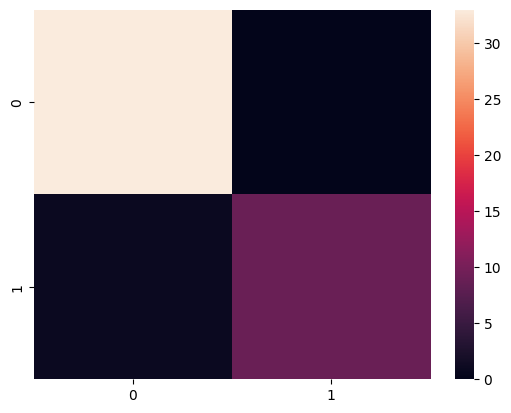

In [49]:
sns.heatmap(cm)
plt.show()

In [ ]:
Conclusion
We are able to achieve over 95% accuracy on the test set with Logistic Regression and KNeighborsClassifier and Descision Tree Classifier without the need of any Fine-Tuning when we did not use PCA.

With Principal Component Analysis we were able to achieve even a higher Test accuracy of over 97% on Random Forest Classifier.

Let us plot a bar graph for the same.

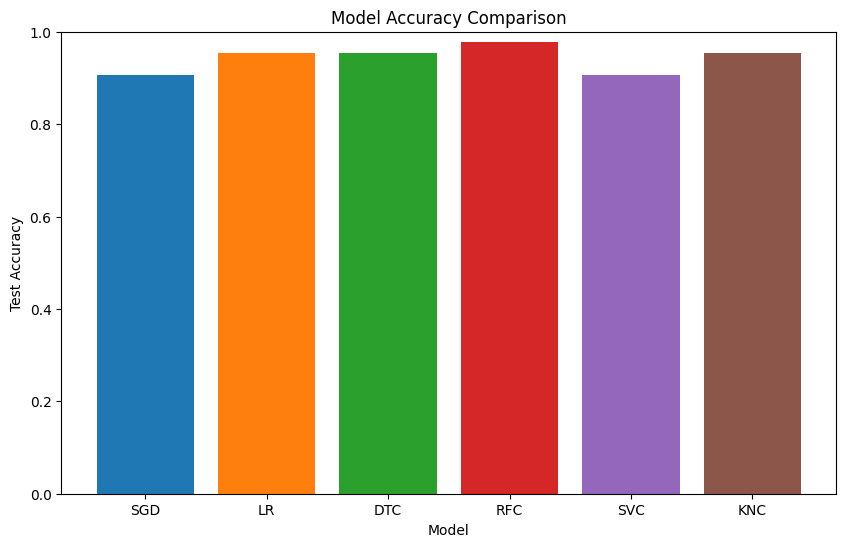

In [50]:
model_names = ['SGD', 'LR', 'DTC', 'RFC', 'SVC', 'KNC']
accuracy_scores = [0.9069767441860465, 0.9534883720930233, 0.9534883720930233, 0.9767441860465116, 0.9069767441860465, 0.9534883720930233 ]
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colours)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()